In [1]:
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

###load all the datasets
##meta_data file
filepath = "/Users/eshwarchandrasekharan/Desktop/buzzed_code/"
meta_df = pd.read_csv(filepath + 'facebook/post_metadata_5-18.csv', index_col=0)
meta_df = meta_df.fillna(0)

##all data file
all_df = pd.read_csv(filepath + 'facebook/post_stats_5-18.csv', index_col=0)
all_df = all_df.fillna(0)

In [ ]:
# import random
# sample_id = random.choice(meta_df['buzz_id'])

# temp_comments = all_df[all_df.external_id == sample_id]

# import math
# ainf = math.inf
# t_df

In [188]:
# import random
# sample_id = random.choice(meta_df['buzz_id'])

dataframes = pd.DataFrame()
count = 0

###Note that this is at a buzz_id or link level, and the predictions are on the first posting's performance
for sample_id in meta_df['buzz_id'][:500]:
    print(count, ") Working on: ", sample_id)
    count += 1
    t_df = meta_df[meta_df['buzz_id'] == sample_id]
    output = t_df[['buzz_id', 'title']].drop_duplicates()
    output['start'] = t_df['created_at'].min()

    all_pages = list(meta_df.page.unique())

    def get_cross_posted_pages(x):
        tf = meta_df[meta_df.buzz_id == x].sort_values('created_at', ascending = 1)
        return tf.page.unique()

    for buzz_id in output['buzz_id']:
        output['pages'] = output['buzz_id'].apply(get_cross_posted_pages)


    ##get earliest external_id for each buzz_id
    def get_first_page(x):
        tf = meta_df[meta_df.buzz_id == x].sort_values('created_at', ascending = 1)
        return tf.external_id.values[0]

    output['pages'] = t_df['buzz_id'].apply(get_cross_posted_pages)
    output['external_id'] = output['buzz_id'].apply(get_first_page)

    ###generate the order of cross-promotion:
    def generate_cat_pages(x, y):
        if(y in x):
            return list(x).index(y) + 1
        else:
            return math.inf

    for pag in all_pages:
    #     print("Getting for ", pag)
        output[pag] = output['pages'].apply(generate_cat_pages, y = pag)

    #####GET PERFORMANCE METRICS

    train_offset = 60
    test_offset = 24*60

    all_features = pd.DataFrame()
    all_predictions = pd.DataFrame()

    for external_id in output['external_id']:

        link_df = all_df[all_df['external_id'] == external_id]
        ###get the row for 1st 1 hour
        ###get the row for 1st day (24 hours)
        start = link_df['stats_date'].min()
#         print(start)
        from datetime import datetime
        try:
            dt1 = datetime.strptime(start, '%Y-%m-%d %H:%M:%S')
        except:
            continue
            
        ###within 30 minutes from posting
        import datetime
        ###set the initial offset period of interest - currently anything within the 1st 30 minutes!
        l_train_offset = datetime.timedelta(minutes=train_offset - 1)
        u_train_offset = datetime.timedelta(minutes=train_offset + 1)

        l_test_offset = datetime.timedelta(minutes=test_offset - 1)
        u_test_offset = datetime.timedelta(minutes=test_offset + 60)

        def get_timestamp(x):
            from datetime import datetime
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

        link_df['stats_timestamp'] = link_df['stats_date'].apply(get_timestamp)
        features = link_df[(link_df.stats_timestamp > dt1 + l_train_offset) & (link_df.stats_timestamp <= dt1 + u_train_offset)][:1]
        predictions = link_df[(link_df.stats_timestamp > dt1 + l_test_offset) & (link_df.stats_timestamp <= dt1 + u_test_offset)][:1]

        all_features = pd.concat([features,all_features])
        all_predictions = pd.concat([predictions,all_predictions])

        dependent_variables = ['external_id', 'consumptions_by_type__link_clicks', 'consumptions_by_type__other_clicks', 
                               'reactions_like_total', 'stories_by_action_type__comment', 'stories_by_action_type__like', 
                               'stories_by_action_type__share', 'engaged_fan', 'fan_reach',
                               'impressions', 'impressions_fan']
        predictor_variables = ['external_id', 'consumptions_by_type__link_clicks', 'stories_by_action_type__share']
        all_features = all_features[dependent_variables]
        all_predictions = all_predictions[predictor_variables]

        dependent_variables = ["train_" + var if var != "external_id" else var for var in dependent_variables]
        predictor_variables = ["test_" + var if var != "external_id" else var for var in predictor_variables]

        all_features.columns = dependent_variables
        all_predictions.columns = predictor_variables

        output = output.join(all_features.set_index('external_id'), on = 'external_id')
        output = output.join(all_predictions.set_index('external_id'), on = 'external_id')
        
        dataframes = pd.concat([output, dataframes])

dataframes.to_csv('links_cross_posting_info.csv', index = False)

0 ) Working on:  3059339


/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1 ) Working on:  3808033
2 ) Working on:  4056239
3 ) Working on:  4120995
4 ) Working on:  4169766
5 ) Working on:  4183282
6 ) Working on:  4212611
7 ) Working on:  4244759
8 ) Working on:  4297018
9 ) Working on:  4320838
10 ) Working on:  4349993
11 ) Working on:  4367956
12 ) Working on:  4372409
13 ) Working on:  4385724
14 ) Working on:  4392578
15 ) Working on:  4401084
16 ) Working on:  4416497
17 ) Working on:  4420741
18 ) Working on:  4422693
19 ) Working on:  4430479
20 ) Working on:  4432461
21 ) Working on:  4433174
22 ) Working on:  4433228
23 ) Working on:  4433323
24 ) Working on:  4433323
25 ) Working on:  4433720
26 ) Working on:  4433727
27 ) Working on:  4433827
28 ) Working on:  4434153
29 ) Working on:  4434501
30 ) Working on:  4434713
31 ) Working on:  4434788
32 ) Working on:  4434805
33 ) Working on:  4434928
34 ) Working on:  4435194
35 ) Working on:  4435427
36 ) Working on:  4435723
37 ) Working on:  4435852
38 ) Working on:  4435883
39 ) Working on:  443

In [189]:
print("Done!")

Done!


In [195]:
dataframes.shape, train.shape

((494, 105), (494, 105))

In [190]:
####without cross-promotion
train = pd.read_csv('links_cross_posting_info.csv')
features = [
                'consumptions_by_type__link_clicks',
                'consumptions_by_type__other_clicks', 
                'reactions_like_total',
                'stories_by_action_type__comment', 
                'stories_by_action_type__like',
                'stories_by_action_type__share', 
                'engaged_fan', 'fan_reach',
                'impressions', 
                'impressions_fan',
               ]
features = ['train_' + var for var in features]

####add the category variable for each of the pages in col_pages
# for pg in all_pages:
#     features.append(pg)

###overall clicks
res = ols(y = train['test_consumptions_by_type__link_clicks'], x = train[features])
print(res)

print('Share performance')

###24-hour share
#     res = ols(y = train['24_hours_share'], x = train[features])
#     print(res)

###overall share
res = ols(y = train['test_stories_by_action_type__share'], x = train[features])
print(res)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <train_consumptions_by_type__link_clicks>
             + <train_consumptions_by_type__other_clicks> + <train_reactions_like_total>
             + <train_stories_by_action_type__comment> + <train_stories_by_action_type__like>
             + <train_stories_by_action_type__share> + <train_engaged_fan>
             + <train_fan_reach> + <train_impressions> + <train_impressions_fan>
             + <intercept>

Number of Observations:         423
Number of Degrees of Freedom:   11

R-squared:         0.9750
Adj R-squared:     0.9743

Rmse:           7634.3561

F-stat (10, 412):  1603.7332, p-value:     0.0000

Degrees of Freedom: model 10, resid 412

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
train_co

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [196]:
####with cross-promotion
train = pd.read_csv('links_cross_posting_info.csv')

features = [
                'consumptions_by_type__link_clicks',
                'consumptions_by_type__other_clicks', 
                'reactions_like_total',
                'stories_by_action_type__comment', 
                'stories_by_action_type__like',
                'stories_by_action_type__share', 
                'engaged_fan', 'fan_reach',
                'impressions', 
                'impressions_fan',
               ]
features = ['train_' + var for var in features]

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###overall clicks
res = ols(y = train['test_consumptions_by_type__link_clicks'], x = train[features])
print(res)

print('Share performance')

###24-hour share
#     res = ols(y = train['24_hours_share'], x = train[features])
#     print(res)

###overall share
res = ols(y = train['test_stories_by_action_type__share'], x = train[features])
print(res)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <train_consumptions_by_type__link_clicks>
             + <train_consumptions_by_type__other_clicks> + <train_reactions_like_total>
             + <train_stories_by_action_type__comment> + <train_stories_by_action_type__like>
             + <train_stories_by_action_type__share> + <train_engaged_fan>
             + <train_fan_reach> + <train_impressions> + <train_impressions_fan>
             + <BuzzFeed Books> + <BuzzFeed España> + <BuzzFeed Scotland> + <SOML>
             + <BuzzFeed News BR> + <Proper Tasty> + <BuzzFeed News>
             + <Obsessed by BuzzFeed> + <BuzzFeed France> + <BuzzFeed> + <BuzzFeed World>
             + <BuzzFeed Australia> + <LOLA> + <BuzzFeed Style> + <Top Knot>
             + <BuzzFeed México> + <BuzzFeed Weddings> + <BuzzFeed Entertainment>
             + <Cocoa Butter> + <Tasty Demais> + <BuzzFeed Open Lab> + <Bien Tasty>
             + <BuzzFeed Food> + <Buzz

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [193]:
meta_df['buzz_id'].unique().shape

(26657,)

In [203]:
all_df.columns

Index(['external_id', 'stats_ts', 'stats_date',
       'consumptions_by_type__link_clicks',
       'consumptions_by_type__other_clicks', 'reactions_like_total',
       'stories_by_action_type__comment', 'stories_by_action_type__like',
       'stories_by_action_type__share', 'engaged_fan', 'fan_reach',
       'impressions', 'impressions_fan'],
      dtype='object')

In [222]:
meta_df.columns

Index(['external_id', 'parent_external_id', 'created_at', 'page', 'post_type',
       'buzz_id', 'uri', 'title'],
      dtype='object')

In [298]:
meta_df['external_id'].head

<bound method NDFrame.head of 0         322109601268040_1088954194583573
1         322109601268040_1130747220404270
2         322109601268040_1051507804994879
3        1433294486996353_1853196495006148
4          250557591819522_685088045033139
5        1433294486996353_1808633382795793
6          250557591819522_685084481700162
7          250557591819522_662096247332319
8         571035253040893_1090332724444474
9          160545781051273_247661595673024
10        322109601268040_1060100840802242
11       1433294486996353_1803371453321986
12       1737181656494507_1833377980208207
13        322109601268040_1088950301250629
14        618786471475708_1363519893669025
15       1433294486996353_1868221766836954
16        618786471475708_1362649743756040
17         280467515620435_395969064070279
18        571035253040893_1041410359336711
19        618786471475708_1360354490652232
20       1433294486996353_1796150460710752
21        618786471475708_1364960663524948
22        61878647147570

In [ ]:
# import random
# sample_id = random.choice(meta_df['buzz_id'])
limit = 5000

dataframes = pd.DataFrame()
count = 0
miss = 0

###Note that this is at a external_id level, and the predictions are on the post's performance within the page
for sample_id in meta_df['external_id'].unique()[:limit]:
    print(count,") Working on: ", sample_id)
    count += 1
    t_df = meta_df[meta_df['external_id'] == sample_id]
    output = t_df[['buzz_id', 'external_id', 'title', 'page']].drop_duplicates()
    output['start'] = t_df['created_at']
    
    all_pages = list(meta_df.page.unique())

    def get_cross_posted_pages(x):
        tf = meta_df[meta_df.buzz_id == x].sort_values('created_at', ascending = 1)
        return tf.page.unique()

    for buzz_id in output['buzz_id']:
        output['pages'] = output['buzz_id'].apply(get_cross_posted_pages)


    ##get earliest external_id for each buzz_id
#     def get_first_page(x):
#         tf = meta_df[meta_df.buzz_id == x].sort_values('created_at', ascending = 1)
#         return tf.external_id.values[0]

    output['pages'] = t_df['buzz_id'].apply(get_cross_posted_pages)
#     output['external_id'] = output['buzz_id'].apply(get_first_page)

    ###generate the order of cross-promotion:
    def generate_cat_pages(x, y):
        if(y in x):
            return list(x).index(y) + 1
        else:
            return math.inf

    for pag in all_pages:
    #     print("Getting for ", pag)
        output[pag] = output['pages'].apply(generate_cat_pages, y = pag)

    #####GET PERFORMANCE METRICS

    train_offset = 60
    test_offset = 24*60

    all_features = pd.DataFrame()
    all_predictions = pd.DataFrame()

    for external_id in output['external_id']:

        link_df = all_df[all_df['external_id'] == external_id]
        ###get the row for 1st 1 hour
        ###get the row for 1st day (24 hours)
        start = link_df['stats_date'].min()
        print(start)
        from datetime import datetime
        try:
            dt1 = datetime.strptime(start, '%Y-%m-%d %H:%M:%S')
        except:
            continue
            
        ###within 30 minutes from posting
        import datetime
        ###set the initial offset period of interest - currently anything within the 1st 30 minutes!
        l_train_offset = datetime.timedelta(minutes=train_offset - 1)
        u_train_offset = datetime.timedelta(minutes=train_offset + 1)

        l_test_offset = datetime.timedelta(minutes=test_offset - 1)
        u_test_offset = datetime.timedelta(minutes=test_offset + 60)

        def get_timestamp(x):
            from datetime import datetime
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

        link_df['stats_timestamp'] = link_df['stats_date'].apply(get_timestamp)
        features = link_df[(link_df.stats_timestamp > dt1 + l_train_offset) & (link_df.stats_timestamp <= dt1 + u_train_offset)][:1]
        predictions = link_df[(link_df.stats_timestamp > dt1 + l_test_offset) & (link_df.stats_timestamp <= dt1 + u_test_offset)][:1]

        all_features = pd.concat([features,all_features])
        all_predictions = pd.concat([predictions,all_predictions])

        dependent_variables = ['external_id', 'consumptions_by_type__link_clicks', 'consumptions_by_type__other_clicks', 
                               'reactions_like_total', 'stories_by_action_type__comment', 'stories_by_action_type__like', 
                               'stories_by_action_type__share', 'engaged_fan', 'fan_reach',
                               'impressions', 'impressions_fan']
        predictor_variables = ['external_id', 'consumptions_by_type__link_clicks', 'stories_by_action_type__share']
        all_features = all_features[dependent_variables]
        all_predictions = all_predictions[predictor_variables]

        dependent_variables = ["train_" + var if var != "external_id" else var for var in dependent_variables]
        predictor_variables = ["test_" + var if var != "external_id" else var for var in predictor_variables]

        all_features.columns = dependent_variables
        all_predictions.columns = predictor_variables

        output = output.join(all_features.set_index('external_id'), on = 'external_id')
        output = output.join(all_predictions.set_index('external_id'), on = 'external_id')

        ###if there are NaNs, DROP - might need to change to handle certain Nans - replace with 0, for instance?
        if output.isnull().values.any():
            miss += 1
            continue
        dataframes = pd.concat([output, dataframes])
dataframes.to_csv(limit + '_external_id_cross_posting_info.csv', index = False)

0 ) Working on:  322109601268040_1088954194583573
2017-02-27 03:35:04
1 ) Working on: 

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 322109601268040_1130747220404270
2017-04-17 22:05:12
2 ) Working on:  322109601268040_1051507804994879
2017-01-08 02:05:04
3 ) Working on:  1433294486996353_1853196495006148
2017-04-04 21:00:54
4 ) Working on:  250557591819522_685088045033139
2017-05-13 07:10:07
5 ) Working on:  1433294486996353_1808633382795793
2017-01-21 19:04:13
6 ) Working on:  250557591819522_685084481700162
2017-05-12 15:05:07
7 ) Working on:  250557591819522_662096247332319
2017-03-27 14:05:06
8 ) Working on:  571035253040893_1090332724444474
2017-03-22 00:17:52
9 ) Working on:  160545781051273_247661595673024
2017-01-27 14:18:11
10 ) Working on:  322109601268040_1060100840802242
2017-01-19 03:35:05
11 ) Working on:  1433294486996353_1803371453321986
2017-01-13 03:00:46
12 ) Working on:  1737181656494507_1833377980208207
nan
13 ) Working on:  322109601268040_1088950301250629
2017-02-26 18:33:30
14 ) Working on:  618786471475708_1363519893669025
2017-01-02 00:35:04
15 ) Working on:  1433294486996353_186822176683

In [257]:
print(miss)

373


In [258]:
###regression -

####without cross-promotion
train = pd.read_csv('2500_external_id_cross_posting_info.csv')
features = [
                'consumptions_by_type__link_clicks',
                'consumptions_by_type__other_clicks', 
                'reactions_like_total',
                'stories_by_action_type__comment', 
                'stories_by_action_type__like',
                'stories_by_action_type__share', 
                'engaged_fan', 'fan_reach',
                'impressions', 
                'impressions_fan',
               ]
features = ['train_' + var for var in features]

####add the category variable for each of the pages in col_pages
# for pg in all_pages:
#     features.append(pg)

###overall clicks
res = ols(y = train['test_consumptions_by_type__link_clicks'], x = train[features])
print(res)

print('Share performance')

###24-hour share
#     res = ols(y = train['24_hours_share'], x = train[features])
#     print(res)

###overall share
res = ols(y = train['test_stories_by_action_type__share'], x = train[features])
print(res)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <train_consumptions_by_type__link_clicks>
             + <train_consumptions_by_type__other_clicks> + <train_reactions_like_total>
             + <train_stories_by_action_type__comment> + <train_stories_by_action_type__like>
             + <train_stories_by_action_type__share> + <train_engaged_fan>
             + <train_fan_reach> + <train_impressions> + <train_impressions_fan>
             + <intercept>

Number of Observations:         2562
Number of Degrees of Freedom:   11

R-squared:         0.9453
Adj R-squared:     0.9451

Rmse:          16553.6790

F-stat (10, 2551):  4411.0265, p-value:     0.0000

Degrees of Freedom: model 10, resid 2551

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
train

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [259]:
####with cross-promotion
train = pd.read_csv('2500_external_id_cross_posting_info.csv')

features = [
                'consumptions_by_type__link_clicks',
                'consumptions_by_type__other_clicks', 
                'reactions_like_total',
                'stories_by_action_type__comment', 
                'stories_by_action_type__like',
                'stories_by_action_type__share', 
                'engaged_fan', 'fan_reach',
                'impressions', 
                'impressions_fan',
               ]
features = ['train_' + var for var in features]

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###overall clicks
res = ols(y = train['test_consumptions_by_type__link_clicks'], x = train[features])
print(res)

print('Share performance')

###24-hour share
#     res = ols(y = train['24_hours_share'], x = train[features])
#     print(res)

###overall share
res = ols(y = train['test_stories_by_action_type__share'], x = train[features])
print(res)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <train_consumptions_by_type__link_clicks>
             + <train_consumptions_by_type__other_clicks> + <train_reactions_like_total>
             + <train_stories_by_action_type__comment> + <train_stories_by_action_type__like>
             + <train_stories_by_action_type__share> + <train_engaged_fan>
             + <train_fan_reach> + <train_impressions> + <train_impressions_fan>
             + <BuzzFeed Books> + <BuzzFeed España> + <BuzzFeed Scotland> + <SOML>
             + <BuzzFeed News BR> + <Proper Tasty> + <BuzzFeed News>
             + <Obsessed by BuzzFeed> + <BuzzFeed France> + <BuzzFeed> + <BuzzFeed World>
             + <BuzzFeed Australia> + <LOLA> + <BuzzFeed Style> + <Top Knot>
             + <BuzzFeed México> + <BuzzFeed Weddings> + <BuzzFeed Entertainment>
             + <Cocoa Butter> + <Tasty Demais> + <BuzzFeed Open Lab> + <Bien Tasty>
             + <BuzzFeed Food> + <Buzz

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#####################

In [252]:
###regression - OLD

####without cross-promotion
train = pd.read_csv('external_id_cross_posting_info.csv')
features = [
                'consumptions_by_type__link_clicks',
                'consumptions_by_type__other_clicks', 
                'reactions_like_total',
                'stories_by_action_type__comment', 
                'stories_by_action_type__like',
                'stories_by_action_type__share', 
                'engaged_fan', 'fan_reach',
                'impressions', 
                'impressions_fan',
               ]
features = ['train_' + var for var in features]

####add the category variable for each of the pages in col_pages
# for pg in all_pages:
#     features.append(pg)

###overall clicks
res = ols(y = train['test_consumptions_by_type__link_clicks'], x = train[features])
print(res)

print('Share performance')

###24-hour share
#     res = ols(y = train['24_hours_share'], x = train[features])
#     print(res)

###overall share
res = ols(y = train['test_stories_by_action_type__share'], x = train[features])
print(res)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <train_consumptions_by_type__link_clicks>
             + <train_consumptions_by_type__other_clicks> + <train_reactions_like_total>
             + <train_stories_by_action_type__comment> + <train_stories_by_action_type__like>
             + <train_stories_by_action_type__share> + <train_engaged_fan>
             + <train_fan_reach> + <train_impressions> + <train_impressions_fan>
             + <intercept>

Number of Observations:         84
Number of Degrees of Freedom:   11

R-squared:         0.9864
Adj R-squared:     0.9845

Rmse:          11389.5231

F-stat (10, 73):   528.5906, p-value:     0.0000

Degrees of Freedom: model 10, resid 73

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
train_consu

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [253]:
####with cross-promotion
train = pd.read_csv('external_id_cross_posting_info.csv')

features = [
                'consumptions_by_type__link_clicks',
                'consumptions_by_type__other_clicks', 
                'reactions_like_total',
                'stories_by_action_type__comment', 
                'stories_by_action_type__like',
                'stories_by_action_type__share', 
                'engaged_fan', 'fan_reach',
                'impressions', 
                'impressions_fan',
               ]
features = ['train_' + var for var in features]

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###overall clicks
res = ols(y = train['test_consumptions_by_type__link_clicks'], x = train[features])
print(res)

print('Share performance')

###24-hour share
#     res = ols(y = train['24_hours_share'], x = train[features])
#     print(res)

###overall share
res = ols(y = train['test_stories_by_action_type__share'], x = train[features])
print(res)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <train_consumptions_by_type__link_clicks>
             + <train_consumptions_by_type__other_clicks> + <train_reactions_like_total>
             + <train_stories_by_action_type__comment> + <train_stories_by_action_type__like>
             + <train_stories_by_action_type__share> + <train_engaged_fan>
             + <train_fan_reach> + <train_impressions> + <train_impressions_fan>
             + <BuzzFeed Books> + <BuzzFeed España> + <BuzzFeed Scotland> + <SOML>
             + <BuzzFeed News BR> + <Proper Tasty> + <BuzzFeed News>
             + <Obsessed by BuzzFeed> + <BuzzFeed France> + <BuzzFeed> + <BuzzFeed World>
             + <BuzzFeed Australia> + <LOLA> + <BuzzFeed Style> + <Top Knot>
             + <BuzzFeed México> + <BuzzFeed Weddings> + <BuzzFeed Entertainment>
             + <Cocoa Butter> + <Tasty Demais> + <BuzzFeed Open Lab> + <Bien Tasty>
             + <BuzzFeed Food> + <Buzz

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [260]:
###cross-validation

Without cross-promotion features
Testing for shares!
(2049, 10) (2049,)
(513, 10) (513,)


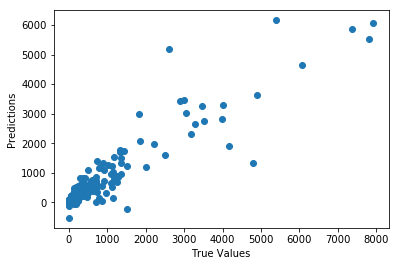

Predict  share
Trial run - Score: 0.863331370621
Cross-validated scores: [ 0.77105551  0.81506742  0.93914607  0.87138327  0.81855918  0.8047759
  0.69248191  0.86607624  0.30264069  0.81379518]
Mean accuracy =  0.769498137074
Cross-Predicted Accuracy (R2): 0.767888997934
Mean Absolute Error:  131.279290478
Testing for clicks!
(2049, 10) (2049,)
(513, 10) (513,)


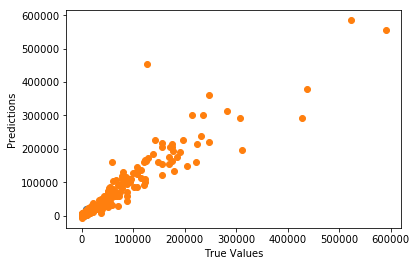

Predict  clicks
Trial run - Score: 0.881448877515
Cross-validated scores: [ 0.77679369  0.88805254  0.97407604  0.95168514  0.96926175  0.91680492
  0.90547039  0.89443216  0.68904772  0.90297055]
Mean accuracy =  0.886859489467
Cross-Predicted Accuracy (R2): 0.931570189598
Mean Absolute Error:  7313.342964
                                          0          0
0   train_consumptions_by_type__link_clicks   3.006817
1  train_consumptions_by_type__other_clicks  -1.367482
2                train_reactions_like_total   2.677035
3     train_stories_by_action_type__comment -10.950915
4        train_stories_by_action_type__like  -0.758689
5       train_stories_by_action_type__share  35.416941
6                         train_engaged_fan   1.455586
7                           train_fan_reach   0.580883
8                         train_impressions  -0.243775
9                     train_impressions_fan  -0.175357


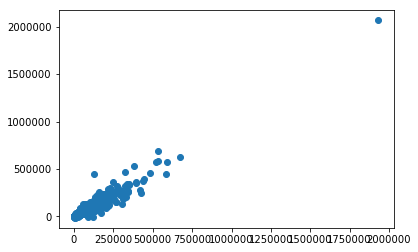

In [294]:
###WITHOUT cross-promotion features
train = pd.read_csv('2500_external_id_cross_posting_info.csv')

print("Without cross-promotion features")

features = [
                'consumptions_by_type__link_clicks',
                'consumptions_by_type__other_clicks', 
                'reactions_like_total',
                'stories_by_action_type__comment', 
                'stories_by_action_type__like',
                'stories_by_action_type__share', 
                'engaged_fan', 'fan_reach',
                'impressions', 
                'impressions_fan',
               ]
features = ['train_' + var for var in features]

# alt_inf = len(all_pages) + 1
# train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
# for pg in all_pages:
#     features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

y_clicks = train['test_consumptions_by_type__link_clicks']
y_share = train['test_stories_by_action_type__share']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))

###get coefficients
import numpy as np
print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

Testing for shares!
(2049, 98) (2049,)
(513, 98) (513,)


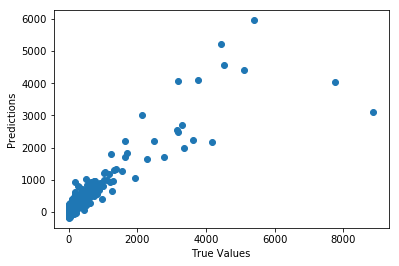

Predict  share
Trial run - Score: 0.806248840943
Cross-validated scores: [ 0.70557198  0.40834479  0.94288424  0.85739218  0.83726923  0.86675633
  0.63703513  0.8536274   0.2817048   0.83403976]
Mean accuracy =  0.722462583347
Cross-Predicted Accuracy (R2): 0.764829303858
Mean Absolute Error:  149.217957763
Testing for clicks!
(2049, 98) (2049,)
(513, 98) (513,)


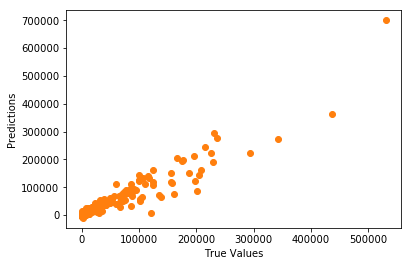

Predict  clicks
Trial run - Score: 0.900499981042
Cross-validated scores: [ 0.69756777  0.84935205  0.96664125  0.94690302  0.96871667  0.90409907
  0.90523753  0.89304527  0.69274644  0.90328467]
Mean accuracy =  0.872759373521
Cross-Predicted Accuracy (R2): 0.929602361965
Mean Absolute Error:  7903.76210752
                                           0             0
0    train_consumptions_by_type__link_clicks  3.827464e+00
1   train_consumptions_by_type__other_clicks -6.449279e-01
2                 train_reactions_like_total  1.346662e+01
3      train_stories_by_action_type__comment  4.390468e+00
4         train_stories_by_action_type__like -8.733088e+00
5        train_stories_by_action_type__share  1.401224e+01
6                          train_engaged_fan  1.900672e-01
7                            train_fan_reach  4.542377e-01
8                          train_impressions -2.072884e-01
9                      train_impressions_fan -1.205219e-01
10                            BuzzFeed B

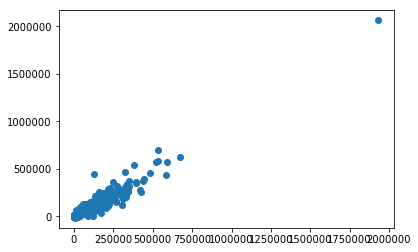

In [293]:
###with cross-promotion 
train = pd.read_csv('2500_external_id_cross_posting_info.csv')

features = [
                'consumptions_by_type__link_clicks',
                'consumptions_by_type__other_clicks', 
                'reactions_like_total',
                'stories_by_action_type__comment', 
                'stories_by_action_type__like',
                'stories_by_action_type__share', 
                'engaged_fan', 'fan_reach',
                'impressions', 
                'impressions_fan',
               ]
features = ['train_' + var for var in features]

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

y_clicks = train['test_consumptions_by_type__link_clicks']
y_share = train['test_stories_by_action_type__share']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))

###get coefficients
import numpy as np
print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

In [283]:
###get coefficients
import numpy as np
pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)

,0,0
0,train_consumptions_by_type__link_clicks,4.956339e+00
1,train_consumptions_by_type__other_clicks,5.296131e-01
2,train_reactions_like_total,1.184404e+01
3,train_stories_by_action_type__comment,-7.684903e+00
4,train_stories_by_action_type__like,-3.812981e+00
5,train_stories_by_action_type__share,1.535880e+01
6,train_engaged_fan,-1.103527e+00
7,train_fan_reach,3.358745e-01
8,train_impressions,-3.814291e-01
9,train_impressions_fan,1.433281e-01
